# **Insights**

## **Store And Department Wise**

### **`which Top 10 stores has highest weekly sales?`**

In [ ]:
mean_sales = df.groupby(['Store']).agg({'Weekly_Sales':'sum'}).reset_index()

z = mean_sales.nlargest(10,'Weekly_Sales').values.tolist()

data = {}

for i in z:
  data.update({i[0]:i[1]})

sorted_data = dict(sorted(data.items(),key=lambda item : item[1],reverse=True))

sorted_data

{20.0: 384648759.3496,
 4.0: 380203195.77,
 13.0: 364638022.01850003,
 14.0: 361708711.7843,
 2.0: 355724132.7469,
 10.0: 323166101.5225,
 27.0: 322310842.4712,
 6.0: 287338501.1619,
 1.0: 285395477.1793,
 39.0: 270218701.6856}

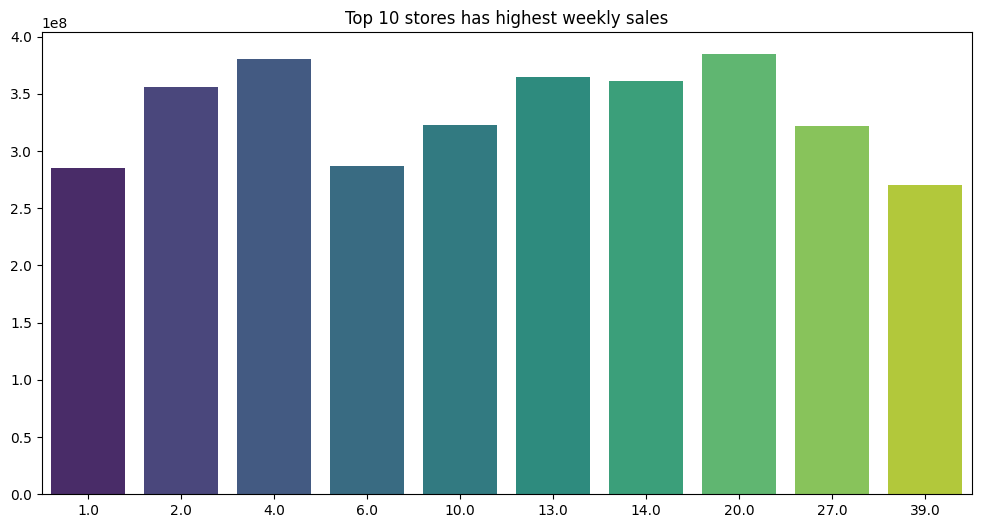

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x=[i for i in sorted_data.keys()],y=[i for i in sorted_data.values()],palette='viridis').set(title='Top 10 stores has highest weekly sales')

plt.show()

### **`Which Top 10 stores has lowest weekly sales?`**

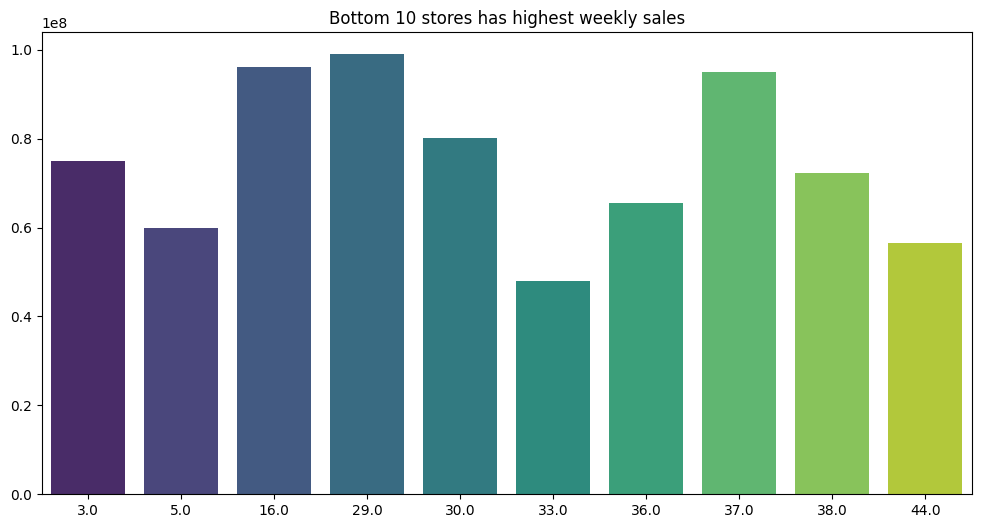

In [ ]:
mean_sales = df.groupby(['Store']).agg({'Weekly_Sales':'sum'}).reset_index()

z = mean_sales.nsmallest(10,'Weekly_Sales').values.tolist()

data = {}

for i in z:
  data.update({i[0]:i[1]})

sorted_data = dict(sorted(data.items(),key=lambda item : item[1],reverse=True))

sorted_data

plt.figure(figsize=(12, 6))

sns.barplot(x=[i for i in sorted_data.keys()],y=[i for i in sorted_data.values()],palette='viridis').set(title='Bottom 10 stores has highest weekly sales')

plt.show()

### **`What is the average weekly sales for each store and department?`**

**Top 10 Store and Department Combination**

In [ ]:
mean_sales = df.groupby(['Store','Dept'])['Weekly_Sales'].mean().reset_index()

mean_sales = mean_sales.sort_values(by='Weekly_Sales',ascending=False).nlargest(10,'Weekly_Sales').reset_index(drop=True)

In [ ]:
mean_sales

,Store,Dept,Weekly_Sales
0,14,92,179398.052128
1,2,92,167580.080444
2,20,92,166652.250008
3,13,92,165281.020550
4,4,92,162491.843151
5,20,95,149625.781360
6,4,95,148257.775456
7,27,92,146442.380895
8,2,95,143894.711652
9,14,95,141559.111009


**Bottom 10 Store and Department Combination**

In [ ]:
mean_sales = df.groupby(['Store','Dept'])['Weekly_Sales'].mean().reset_index()

mean_sales.nsmallest(10,'Weekly_Sales').reset_index(drop=True)

,Store,Dept,Weekly_Sales
0,35,47,-156.215091
1,16,47,-138.368553
2,7,47,-81.290687
3,1,47,-70.611231
4,45,47,-59.007076
5,23,47,-53.725563
6,10,47,-49.228808
7,42,72,-37.857734
8,29,47,-37.633598
9,12,47,-36.973295


### **`What are the Departments Perform Better In Specific Store Types?`**

In [ ]:
mention_store_type = int(input('Enter Store Type:'))
performance_in_store_types = df.query(f'Type=={mention_store_type}').groupby(['Dept','Store'])['Weekly_Sales'].sum().reset_index()
performance_in_store_types.nlargest(10,'Weekly_Sales')

Enter Store Type:2


,Dept,Store,Weekly_Sales
944,72,10,2.379718e+07
598,38,3,1.909734e+07
620,40,10,1.814813e+07
21,2,10,1.723232e+07
602,38,10,1.628212e+07
955,72,35,1.611717e+07
123,8,10,1.510784e+07
952,72,23,1.443185e+07
606,38,17,1.441846e+07
601,38,9,1.411173e+07


### **`What are the Departments Not Performing Better In Specific Store Types?`**

In [ ]:
mention_store_type = int(input('Enter Store Type:'))
performance_in_store_types = df.query(f'Type=={mention_store_type}').groupby(['Dept','Store'])['Weekly_Sales'].sum().reset_index()
performance_in_store_types.nsmallest(10,'Weekly_Sales')

Enter Store Type:2


,Dept,Store,Weekly_Sales
788,51,45,447.8690
785,51,25,867.8351
686,45,3,1013.6541
775,51,9,1142.0524
778,51,15,1142.6755
696,45,21,1173.4018
781,51,18,1224.7932
689,45,9,1274.1504
701,45,35,1301.1567
777,51,12,1321.5412


## **Time Analysis**

### **`Is there a long-term trend in weekly sales over the years?`**

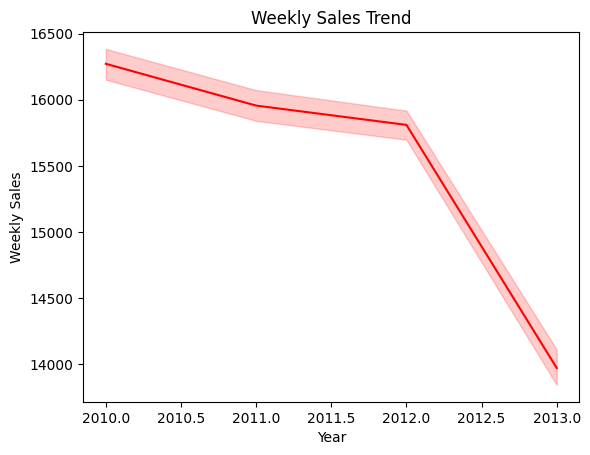

In [ ]:
sns.lineplot(x='Year',y='Weekly_Sales',data=df,color='r')
plt.title('Weekly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()



```
# Note : It suggest the Negative Trend In Long-Term
```



### **`Do sales tend to be higher on Holidays?`**

In [ ]:
df.IsHoliday.unique()

array([0, 1])

In [ ]:
df.IsHoliday = df.IsHoliday.map({0:'False',1:'True'})

In [ ]:
df.IsHoliday.unique()

array(['False', 'True'], dtype=object)

In [ ]:
data = df.groupby(['IsHoliday','Year'])['Weekly_Sales'].sum().reset_index()
data

,IsHoliday,Year,Weekly_Sales
0,False,2010,2.088912e+09
1,False,2011,2.241690e+09
2,False,2012,2.270509e+09
3,False,2013,1.347777e+09
4,True,2010,2.002472e+08
5,True,2011,2.067828e+08
6,True,2012,2.182187e+08
7,True,2013,4.816360e+07


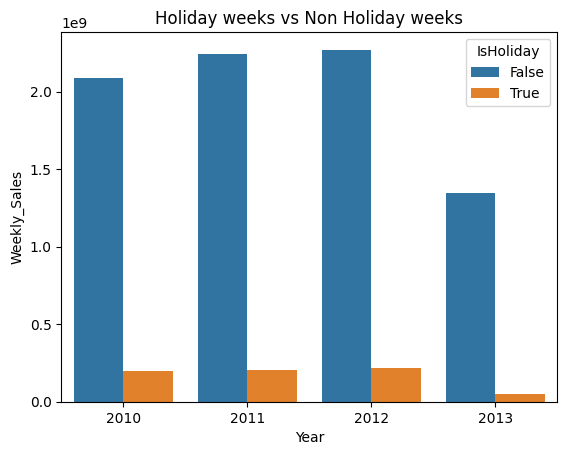

In [ ]:
sns.barplot(data=data,x='Year',y='Weekly_Sales',hue='IsHoliday')
plt.title('Holiday weeks vs Non Holiday weeks')
plt.savefig('holi.png',dpi=300)
plt.show()

### **`What is the distribution of weekly sales across different months?`**

In [ ]:
data = df.groupby('Month')['Weekly_Sales'].sum().reset_index().nlargest(12,'Weekly_Sales')

data

,Month,Weekly_Sales
6,7,8.409440e+08
3,4,8.325118e+08
2,3,8.275375e+08
5,6,8.129125e+08
4,5,7.927630e+08
11,12,7.911299e+08
1,2,7.551609e+08
10,11,6.871716e+08
7,8,6.131491e+08
9,10,5.848189e+08


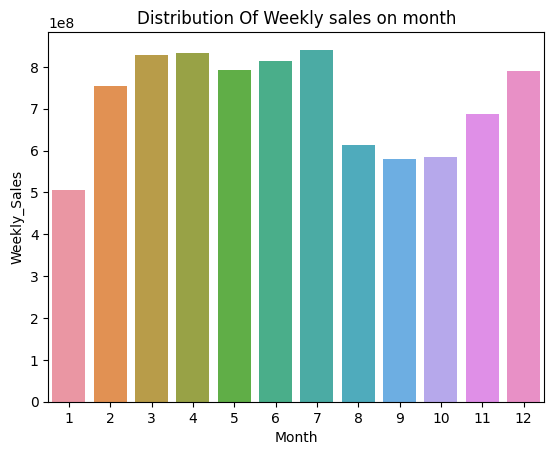

In [ ]:
sns.barplot(data=data,x='Month',y='Weekly_Sales')
plt.title('Distribution Of Weekly sales on month')
plt.show()



```
# Note : December Month has got the highest weekly sales in overall year
```





```
# Note : All the Week Of Day Comes only in Friday
```



## **Markdowns and Promotions**

### **`How do markdowns (markdown1, markdown2, markdown3, markdown4, markdown5) correlate with weekly sales?`**

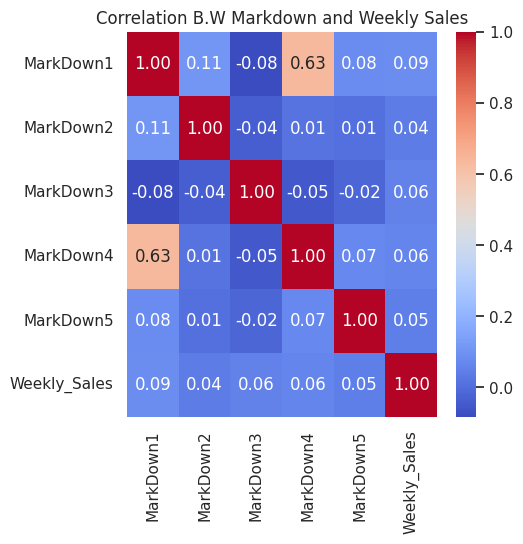

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(df[['MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5','Weekly_Sales'	]].corr(),annot=True,cmap='coolwarm', fmt='.2f')

plt.title('Correlation B.W Markdown and Weekly Sales')

plt.show()

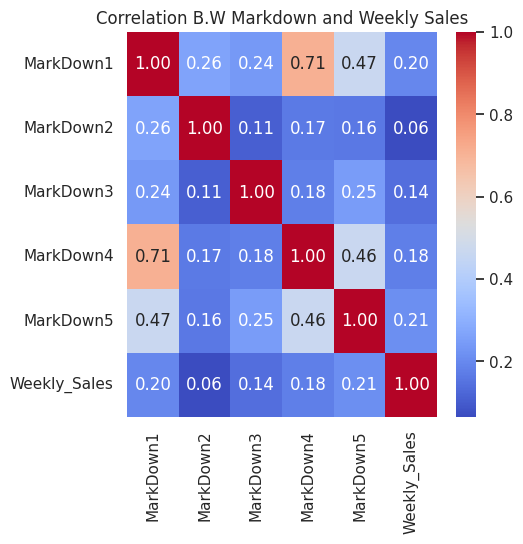

In [ ]:
c = df[['MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5','Weekly_Sales'	]]

confusion_matrix , _ = spearmanr(c)

plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix,annot=True,cmap='coolwarm', fmt='.2f', xticklabels=c.columns, yticklabels=c.columns)

plt.title('Correlation B.W Markdown and Weekly Sales')

plt.show()

## **Economic Indicators**

### **`Is there a relationship between the Consumer Price Index (CPI) and weekly sales?`**


In [ ]:
df[['Weekly_Sales','CPI']].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.000000,-0.019125
CPI,-0.019125,1.000000


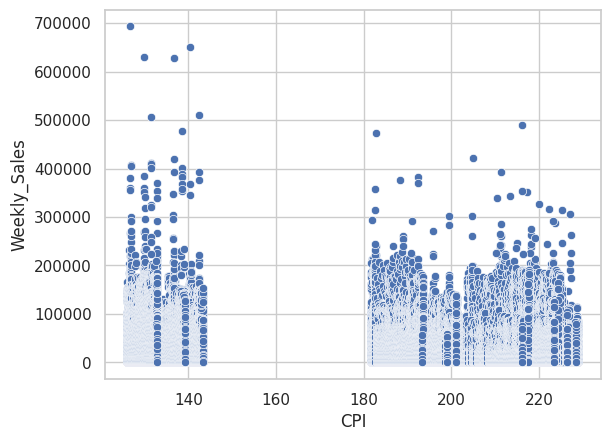

In [ ]:
sns.scatterplot(data=df , x ='CPI',y='Weekly_Sales')

plt.show()

### **`what is the mean customer price index on every year?`**

In [ ]:
mean_cpi = df.groupby('Year')['CPI'].mean().reset_index()

data = mean_cpi.nlargest(4,'CPI').reset_index(drop=True)

data

,Year,CPI
0,2013,177.473750
1,2012,175.336752
2,2011,171.181195
3,2010,167.727885


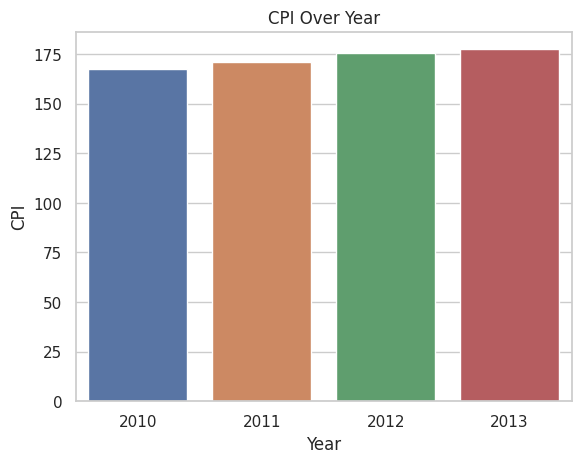

In [ ]:
sns.barplot(data=data,x='Year',y='CPI')

plt.title('CPI Over Year')

plt.show()

### **`What is mean unemployment over years`**

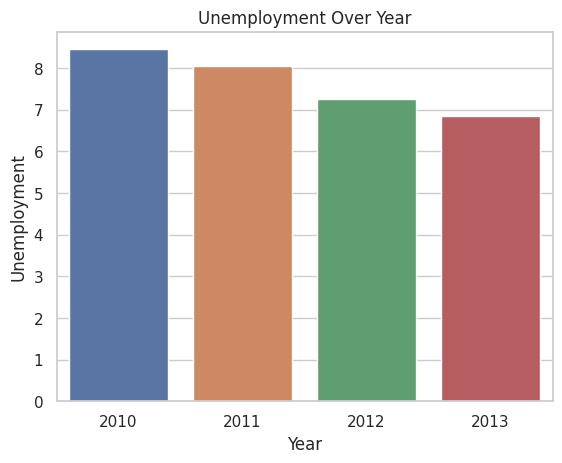

In [ ]:
mean_cpi = df.groupby('Year')['Unemployment'].mean().reset_index()

data = mean_cpi.nlargest(4,'Unemployment').reset_index(drop=True)

sns.barplot(data=data,x='Year',y='Unemployment')

plt.title('Unemployment Over Year')

plt.show()

### **`Specific Store CPI Trend`**


Enter The Store Number : 2



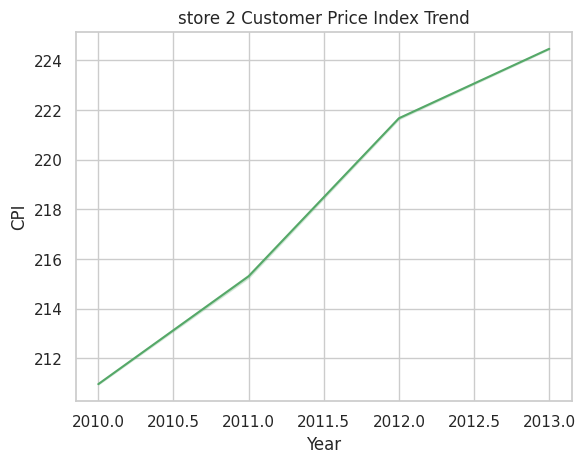

In [ ]:
store_no = int(input('Enter The Store Number : '))
print()

query_data = df.query(f' Store == {store_no}')

sns.lineplot(data=query_data,x='Year',y='CPI',color='g')

plt.title(f'store {store_no} Customer Price Index Trend')

plt.show()

## **Holidays and Special Events**

### **`How do holidays impact weekly sales Over Year`**

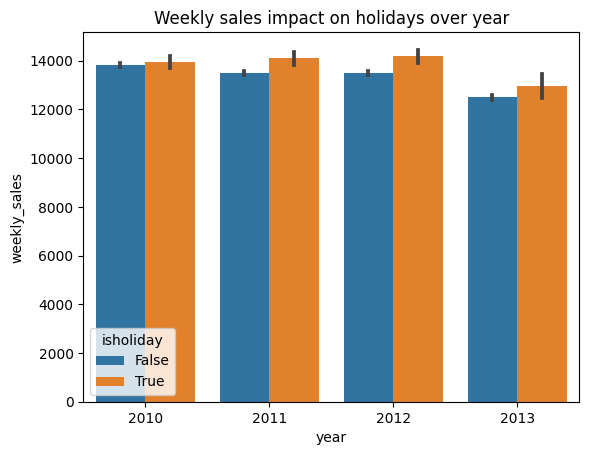

In [ ]:
sns.barplot(data=df,x='year',y='weekly_sales',hue='isholiday')

plt.title('Weekly sales impact on holidays over year')

plt.show()

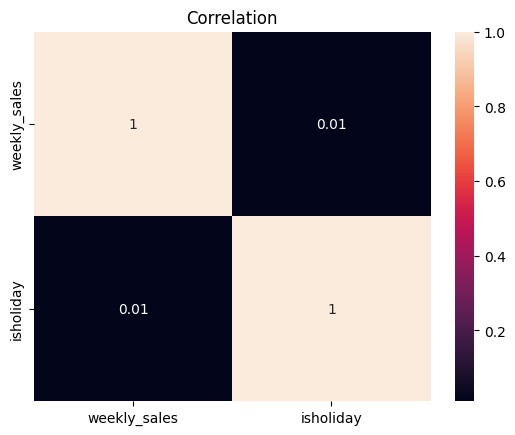

In [ ]:
sns.heatmap(df[['weekly_sales','isholiday']].corr(),annot=True)

plt.title('Correlation')

plt.show()

### **`What are the stores has got higher sales in holidays?`**

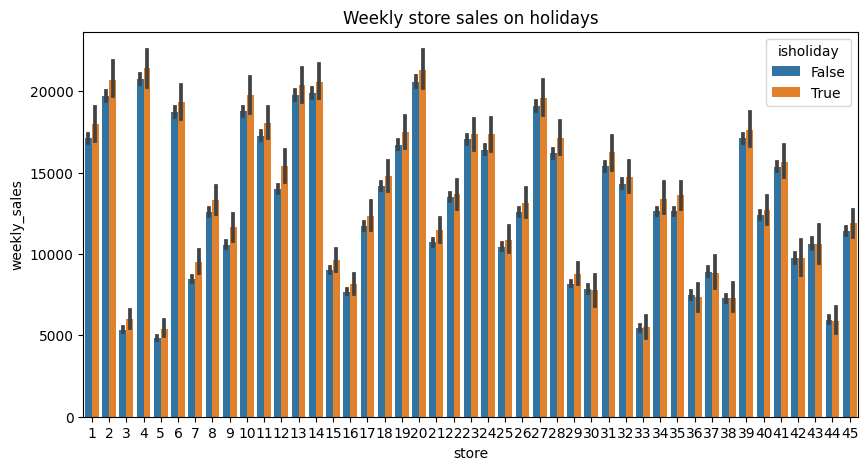

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(data=df,x='store',y='weekly_sales',hue='isholiday')

plt.title('Weekly store sales on holidays')

plt.show()

### **`Correlation Of Holiday B.W Markdown`**

In [ ]:
df.IsHoliday.unique()

array(['False', 'True'], dtype=object)

In [ ]:
df.IsHoliday = df.IsHoliday.map({'False':0, 'True':1})

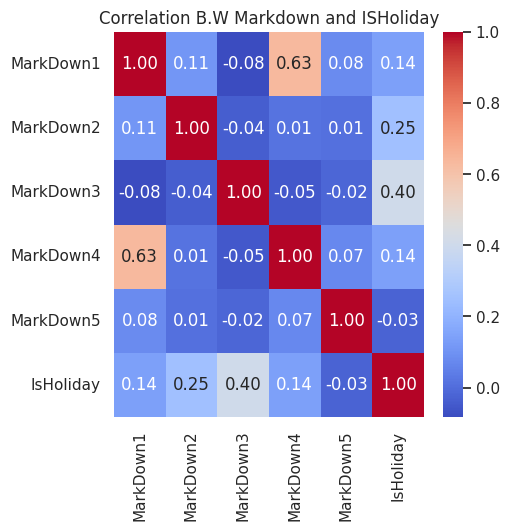

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(df[['MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5','IsHoliday'	]].corr(),annot=True,cmap='coolwarm', fmt='.2f')

plt.title('Correlation B.W Markdown and ISHoliday')

plt.show()

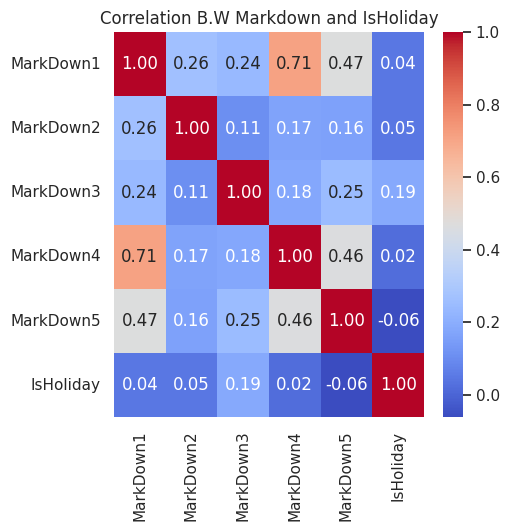

In [ ]:
c = df[['MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5','IsHoliday'	]]

confusion_matrix , _ = spearmanr(c)

plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix,annot=True,cmap='coolwarm', fmt='.2f', xticklabels=c.columns, yticklabels=c.columns)

plt.title('Correlation B.W Markdown and IsHoliday')

plt.show()


## **Store Factors**

### **`Does store size correlate with weekly sales?`**

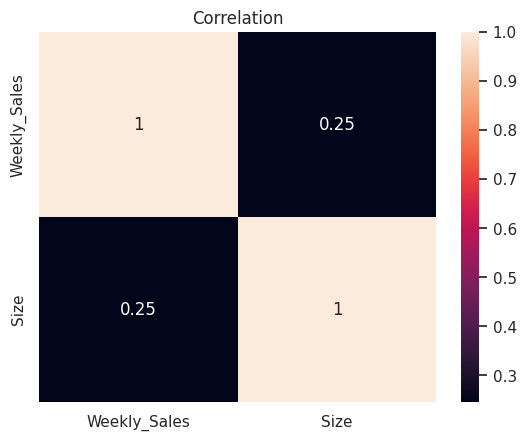

In [ ]:
sns.heatmap(df[['Weekly_Sales','Size']].corr(),annot=True)

plt.title('Correlation')

plt.show()

### **`Impact of large store size`**

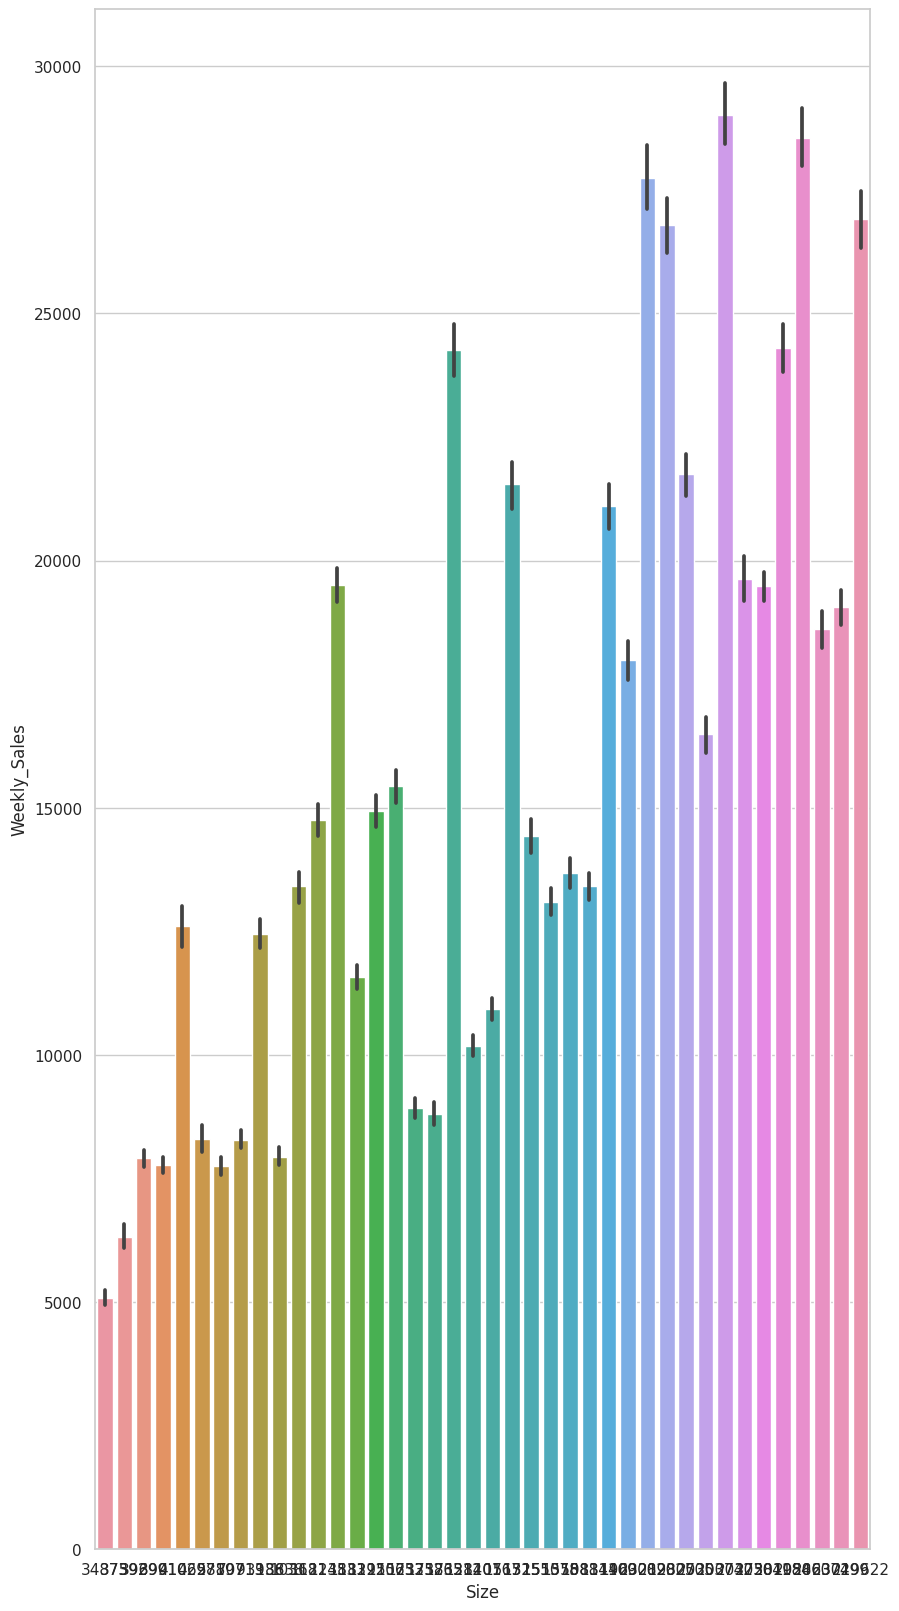

In [ ]:
plt.figure(figsize=(10,20))

sns.barplot(data=df,x='Size',y='Weekly_Sales')

plt.show()

### **`Weekly sales Impact On Store Types`**

In [ ]:
# df.store_type = df.store_type.map({1:'A',2:'B',3:'C'})

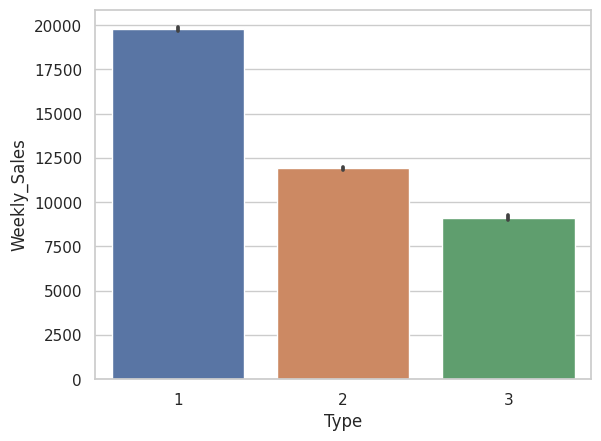

In [ ]:
sns.barplot(data=df,x='Type',y='Weekly_Sales')

plt.show()

## **Weather and Temperature**

### **`Is there a correlation between temperature and weekly sales?`**

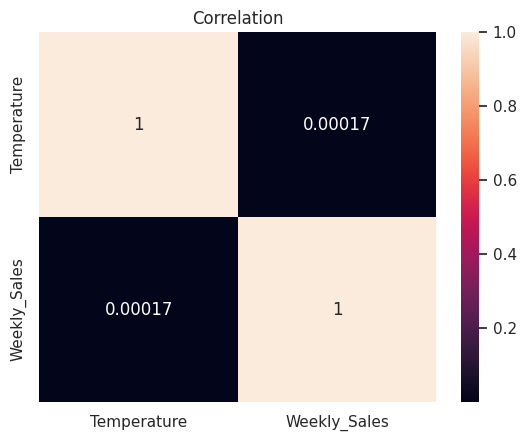

In [ ]:
sns.heatmap(df[['Temperature','Weekly_Sales']].corr(),annot=True)

plt.title('Correlation')

plt.show()

### **` Do sales tend to increase during certain weather conditions?`**

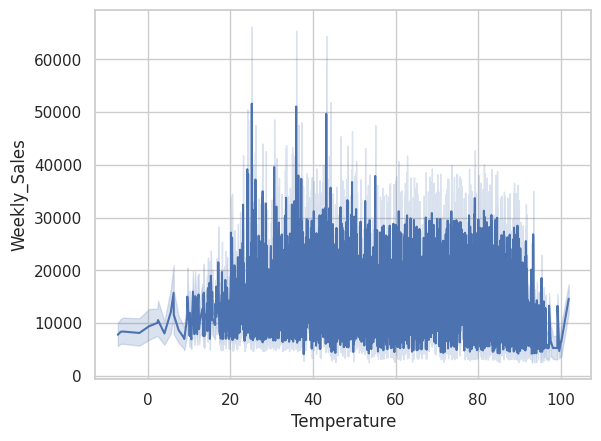

In [ ]:
sns.lineplot(data=df,x='Temperature',y='Weekly_Sales')

plt.show()

## **Sales Trends Over Time**

### **`How have weekly sales evolved over time for specific departments?`**

Enter The Dept Number : 2



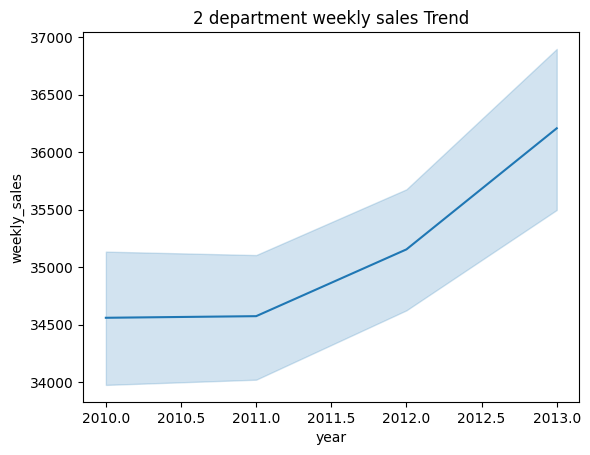

In [ ]:
department_no = int(input('Enter The Dept Number : '))
print()

query_data = df.query(f'sale_department=={department_no}')

sns.lineplot(data=query_data,x='year',y='weekly_sales')

plt.title(f'{department_no} department weekly sales Trend')

plt.show()

### **`How have weekly sales evolved over time for specific store and departments?`**

Enter The Dept Number : 3
Enter The Store Number : 45



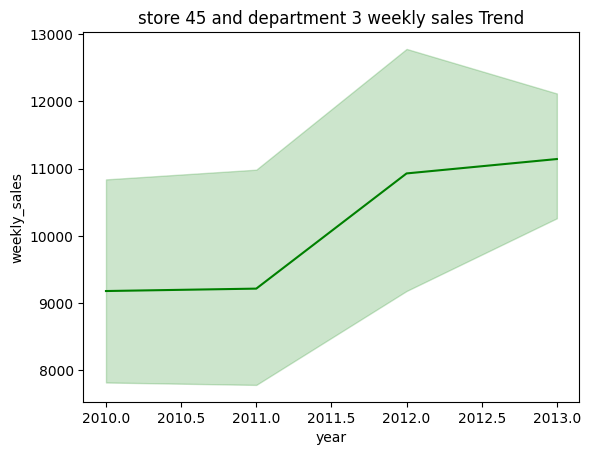

In [ ]:
department_no = int(input('Enter The Dept Number : '))
store_no = int(input('Enter The Store Number : '))
print()

query_data = df.query(f' store == {store_no} and sale_department=={department_no}')

sns.lineplot(data=query_data,x='year',y='weekly_sales',color='g')

plt.title(f'store {store_no} and department {department_no} weekly sales Trend')

plt.show()